In [1]:
# LABORATORIUM 4 - ZADANIE 1
# IMIĘ i NAZWISKO: MICHAŁ WÓJCIK

In [2]:
# Zaimportowanie niezbędnych bibliotek
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay, roc_curve, auc

# Ustawienie rozmiarów obrazów
img_width, img_height = 224, 224

In [3]:
# Ustawienie ścieżek do folderów z danymi oraz ilosci próbek, epok i rozmiaru batcha
train_data_dir_path = 'train'
validation_data_dir_path = 'test'
nb_train_samples =400
nb_validation_samples = 100
epochs = 10
batch_size = 16

In [4]:
# Ustawienie wymiarów wejściowych w zależności od formatu obrazu
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else: # channels_last
    input_shape = (img_width, img_height, 3)

In [5]:
# Stworzenie modelu konwolucyjnej sieci neuronowej (CNN)
# Składa się z trzech bloków konwolucyjych, a każdy blok składa się z warstwy konwolucyjnej, warstwy aktywacji i warstwy pooling.
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

C:\Moje pliki\uczelnia\semestr_6\SIwR\repo\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 223, 223, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 223, 223, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 110, 110, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 54, 54, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 46656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,986,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,998,913 (11.44 MB)

 Trainable params: 2,998,913 (11.44 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Zbudowanie (kompilacja) modelu
model.compile(loss='binary_crossentropy',
			optimizer='rmsprop',
			metrics=['accuracy'])

In [7]:
# Augmentacja danych wejściowych - odbywa się dopiero w trakcie trenowania modelu
train_data_generator = ImageDataGenerator(
	rescale=1. / 255,
	shear_range=0.2,
	zoom_range=0.2,
	horizontal_flip=True)

test_data_generator = ImageDataGenerator(rescale=1. / 255)

train_generator = train_data_generator.flow_from_directory(
	train_data_dir_path,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')

validation_generator = test_data_generator.flow_from_directory(
	validation_data_dir_path,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')

# Trenowanie modelu
model_history = model.fit(
	train_generator,
	steps_per_epoch=nb_train_samples // batch_size,
	epochs=epochs,
	validation_data=validation_generator,
	validation_steps=nb_validation_samples // batch_size)

Found 400 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10


C:\Moje pliki\uczelnia\semestr_6\SIwR\repo\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - accuracy: 0.5361 - loss: 0.8422 - val_accuracy: 0.6000 - val_loss: 0.5667
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.5667
Epoch 3/10


C:\Users\acer\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.7404 - loss: 0.5999 - val_accuracy: 0.9500 - val_loss: 0.2884
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9500 - val_loss: 0.2884
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.8213 - loss: 0.4658 - val_accuracy: 0.7500 - val_loss: 0.3571
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.3571
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.8284 - loss: 0.4412 - val_accuracy: 0.9000 - val_loss: 0.2319
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9000 - val_loss: 0.2319
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.8352 - loss: 0.4094 - val_accuracy: 0.9500 - val_loss: 0.1963
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - va

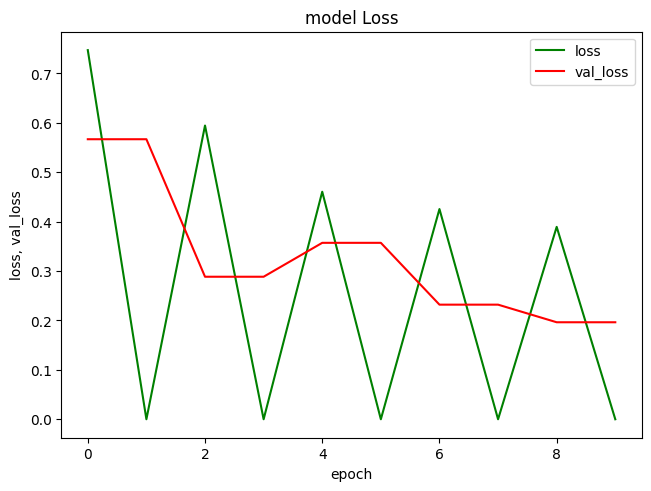

In [8]:
# Wykres wartości funkcji straty dla zbioru treningowego i walidacyjnego
plt.figure(constrained_layout=True)
plt.plot(model_history.history['loss'], 'g')
plt.plot(model_history.history['val_loss'], 'r')
plt.title('model Loss')
plt.ylabel('loss, val_loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])

In [9]:
# Stworzenie tablic przechowujących wartości predykcji, wartości rzeczywistych i wyniku przewidywania
predClass = []
actClass = []
predClassScore = []

# Przewidywanie klas dla obrazów z folderu testowego
for i in range(41, 51):
	actClass.append(0)
	print('test/cars/' + str(i) + '.jpg')
	image = load_img('test/cars/' + str(i) + '.jpg', target_size=(224, 224))
	img = np.array(image)
	img = img / 255.0
	img = img.reshape(1, 224, 224, 3)
	label = model.predict(img)
	
	print("Predicted Class (0 - Cars, 1 - Planes): ", label[0][0])
	
	if label[0][0] < 0.5:
		predClass.append(0)
	else:
		predClass.append(1)
		
	predClassScore.append(label[0][0])
	
for i in range(41, 51):
	actClass.append(1)
	print('test/planes/' + str(i) + '.jpg')
	image = load_img('test/planes/' + str(i) + '.jpg', target_size=(224, 224))
	img = np.array(image)
	img = img / 255.0
	img = img.reshape(1, 224, 224, 3)
	label = model.predict(img)
	
	print("Predicted Class (0 - Cars, 1 - Planes): ", label[0][0])
	
	if label[0][0] < 0.5:
		predClass.append(0)
	else:
		predClass.append(1)
		
	predClassScore.append(label[0][0])

test/cars/41.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted Class (0 - Cars, 1 - Planes):  0.32214984
test/cars/42.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Class (0 - Cars, 1 - Planes):  0.020406663
test/cars/43.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Class (0 - Cars, 1 - Planes):  0.19844799
test/cars/44.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Class (0 - Cars, 1 - Planes):  0.0055264095
test/cars/45.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Class (0 - Cars, 1 - Planes):  0.3670917
test/cars/46.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Class (0 - Cars, 1 - Planes):  0.22153206
test/cars/47.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Class (0 - Cars, 1 - Planes):  0.034520734
test/cars/48.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Class (0 - Cars, 1 - Planes):  0.19497293
test/cars/49.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Class (0 - Cars, 1 - Planes):  0.01891637
test/cars/50.jpg
1/1 ━━━━━━━━━━━━

In [10]:
# LABORATORIUM 4 - ZADANIE 2
# IMIĘ i NAZWISKO: MICHAŁ WÓJCIK

In [11]:
# Wyznaczanie macierzy konfuzji
tn, fp, fn, tp = confusion_matrix(actClass, predClass).ravel()
# tn - true negative, fp - false positive, fn - false negative, tp - true positive
(tn, fp, fn, tp)

(10, 0, 1, 9)

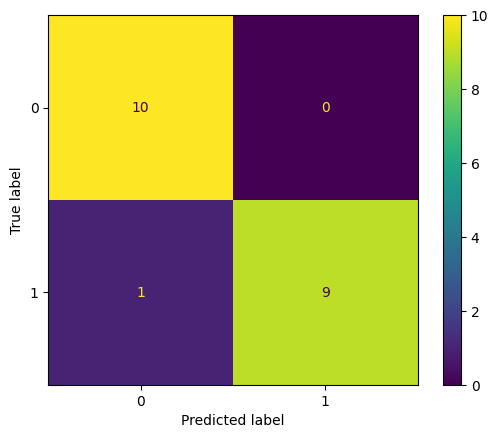

In [12]:
# Wyświetlanie macierzy konfuzji
ConfusionMatrixDisplay.from_predictions(actClass, predClass)

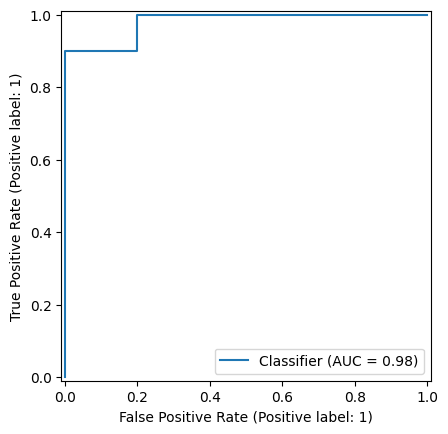

In [13]:
# Wyznaczanie i wyświetlanie krzywej ROC (sposob 1)
RocCurveDisplay.from_predictions(actClass, predClassScore)

In [19]:
# Wyznaczanie optymalnego progu odcięcia POPRAWIC
fpr, tpr, thresholds = roc_curve(actClass, predClassScore, pos_label=1)
print(fpr, tpr, thresholds)
roc_auc = auc(fpr, tpr)
print(roc_auc)
optimal_idx = np.argmin(np.abs(tpr - fpr))
print(optimal_idx)
optimal_threshold = thresholds[optimal_idx]
print("Optymalny próg odcięcia: ", optimal_threshold)

[0.  0.  0.  0.2 0.2 1. ] [0.  0.1 0.9 0.9 1.  1. ] [       inf 0.9894618  0.51558614 0.32214984 0.28101125 0.00551547]
0.9800000000000001
0
Optymalny próg odcięcia:  inf
